<a href="https://colab.research.google.com/github/simonnguyen1234/premierleaugeanalysis/blob/main/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [2]:
import glob
glob.glob('/content/drive/My Drive/data-epl/premier-league*.csv')

['/content/drive/My Drive/data-epl/premier-league2000.csv',
 '/content/drive/My Drive/data-epl/premier-league2001.csv',
 '/content/drive/My Drive/data-epl/premier-league2002.csv',
 '/content/drive/My Drive/data-epl/premier-league2003.csv',
 '/content/drive/My Drive/data-epl/premier-league2004.csv',
 '/content/drive/My Drive/data-epl/premier-league2005.csv',
 '/content/drive/My Drive/data-epl/premier-league2006.csv',
 '/content/drive/My Drive/data-epl/premier-league2007.csv',
 '/content/drive/My Drive/data-epl/premier-league2008.csv',
 '/content/drive/My Drive/data-epl/premier-league2009.csv',
 '/content/drive/My Drive/data-epl/premier-league2010.csv',
 '/content/drive/My Drive/data-epl/premier-league2011.csv',
 '/content/drive/My Drive/data-epl/premier-league2012.csv',
 '/content/drive/My Drive/data-epl/premier-league2013.csv',
 '/content/drive/My Drive/data-epl/premier-league2014.csv',
 '/content/drive/My Drive/data-epl/premier-league2015.csv',
 '/content/drive/My Drive/data-epl/premi

In [3]:
all_dfs = []
for one_filename in glob.glob('/content/drive/My Drive/data-epl/premier-league*.csv'):
  print(f'Loading {one_filename}')
  new_df = pd.read_csv(one_filename, usecols=['club','nationality','position', 'short_pos','market_value','fee','movement','window','season'])
  all_dfs.append(new_df)

Loading /content/drive/My Drive/data-epl/premier-league2000.csv
Loading /content/drive/My Drive/data-epl/premier-league2001.csv
Loading /content/drive/My Drive/data-epl/premier-league2002.csv
Loading /content/drive/My Drive/data-epl/premier-league2003.csv
Loading /content/drive/My Drive/data-epl/premier-league2004.csv
Loading /content/drive/My Drive/data-epl/premier-league2005.csv
Loading /content/drive/My Drive/data-epl/premier-league2006.csv
Loading /content/drive/My Drive/data-epl/premier-league2007.csv
Loading /content/drive/My Drive/data-epl/premier-league2008.csv
Loading /content/drive/My Drive/data-epl/premier-league2009.csv
Loading /content/drive/My Drive/data-epl/premier-league2010.csv
Loading /content/drive/My Drive/data-epl/premier-league2011.csv
Loading /content/drive/My Drive/data-epl/premier-league2012.csv
Loading /content/drive/My Drive/data-epl/premier-league2013.csv
Loading /content/drive/My Drive/data-epl/premier-league2014.csv
Loading /content/drive/My Drive/data-epl

In [4]:
#concatenate
df = pd.concat(all_dfs)

In [12]:
df.shape

(13328, 9)

In [16]:
print(df.dtypes)

club             object
nationality      object
position         object
short_pos        object
market_value    float64
fee             float64
movement         object
window           object
season            int64
dtype: object


In [5]:
#Choose data for period 2000-2010
df_1 = df[(df['season'] >= 2000) & (df['season'] <= 2010)]
print(df_1)

                        club nationality        position short_pos  \
0                 Arsenal FC      France  Second Striker        SS   
1                 Arsenal FC     England  Centre-Forward        CF   
2                 Arsenal FC    Cameroon      Right-Back        RB   
3                 Arsenal FC      France   Left Midfield        LM   
4                 Arsenal FC      Latvia     Centre-Back        CB   
..                       ...         ...             ...       ...   
635  Wolverhampton Wanderers       Wales  Centre-Forward        CF   
636  Wolverhampton Wanderers     England     Centre-Back        CB   
637  Wolverhampton Wanderers     England       Left-Back        LB   
638  Wolverhampton Wanderers     England       Left-Back        LB   
639  Wolverhampton Wanderers     England     Centre-Back        CB   

     market_value         fee movement  window  season  
0             NaN  17500000.0       in  summer    2000  
1             NaN  15300000.0       in  summe

In [21]:
#Choose data for period 2011-2021
df_2 = df[(df['season'] >= 2011) & (df['season'] <= 2021)]
print(df_2)

                          club    nationality            position short_pos  \
0                   Arsenal FC        England    Central Midfield        CM   
1                   Arsenal FC  Cote d'Ivoire         Left Winger        LW   
2                   Arsenal FC          Spain    Central Midfield        CM   
3                   Arsenal FC        Germany         Centre-Back        CB   
4                   Arsenal FC         Brazil  Attacking Midfield        AM   
..                         ...            ...                 ...       ...   
334  West Ham United Wanderers       Paraguay         Centre-Back        CB   
335  West Ham United Wanderers       Portugal        Right Winger        RW   
336  West Ham United Wanderers        Denmark         Centre-Back        CB   
337  West Ham United Wanderers    New Zealand         Centre-Back        CB   
338  West Ham United Wanderers        Ireland  Defensive Midfield        DM   

     market_value         fee movement  window  sea

**Which club spent the most during 2000-1010**

In [6]:
def sum_condition(group):
    return group[group['movement'] == 'in']['fee'].sum()

# group the DataFrame by column 'A' and apply the custom function
club_spent = df_1.groupby('club').apply(sum_condition)


club_spent = club_spent.sort_values(ascending=False)
print(club_spent)

club
Chelsea FC                 861570000.0
Manchester City            671670000.0
Liverpool FC               564550000.0
Tottenham Hotspur          542175000.0
Manchester United          528210000.0
Arsenal FC                 312020000.0
Newcastle United           302435000.0
Aston Villa                283440000.0
Sunderland AFC             267865000.0
West Ham United            233125000.0
Everton FC                 222389000.0
Middlesbrough FC           208060000.0
Fulham FC                  191815000.0
Portsmouth FC              142105000.0
Blackburn Rovers           137070000.0
Birmingham City            131605000.0
Wigan Athletic             120715000.0
Leeds United               115555000.0
Bolton Wanderers            91905000.0
Charlton Athletic           86550000.0
West Bromwich Albion        86250000.0
Stoke City                  81100000.0
Southampton FC              53005000.0
Wolverhampton Wanderers     49540000.0
Derby County                40590000.0
Hull City           

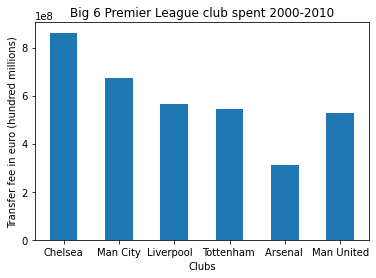

In [32]:
#chart
import matplotlib.pyplot as plt
import numpy as np

x = np.array(['Chelsea', 'Man City', 'Liverpool   ','Tottenham ', 'Arsenal ','Man United'])
y = np.array([861570000, 671670000, 564550000, 542175000,312020000,528210000 ])

width = 0.5
spacing = 0.5

plt.bar(x, y, width=width)
plt.title('Big 6 Premier League club spent 2000-2010')
plt.xlabel('Clubs')
plt.ylabel('Transfer fee in euro (hundred millions)')

plt.show()


In [18]:
#club spent as a fraction of toal market 2000-2010

spend_sum = club_spent.sum()
club_spent_percentage = club_spent / spend_sum
club_spent_percentage = club_spent_percentage.apply(lambda x: '{:.2%}'.format(x))
print(club_spent_percentage)

club
Chelsea FC                 13.20%
Manchester City            10.29%
Liverpool FC                8.65%
Tottenham Hotspur           8.30%
Manchester United           8.09%
Arsenal FC                  4.78%
Newcastle United            4.63%
Aston Villa                 4.34%
Sunderland AFC              4.10%
West Ham United             3.57%
Everton FC                  3.41%
Middlesbrough FC            3.19%
Fulham FC                   2.94%
Portsmouth FC               2.18%
Blackburn Rovers            2.10%
Birmingham City             2.02%
Wigan Athletic              1.85%
Leeds United                1.77%
Bolton Wanderers            1.41%
Charlton Athletic           1.33%
West Bromwich Albion        1.32%
Stoke City                  1.24%
Southampton FC              0.81%
Wolverhampton Wanderers     0.76%
Derby County                0.62%
Hull City                   0.50%
Leicester City              0.49%
Ipswich Town                0.46%
Reading FC                  0.33%
Coventry 

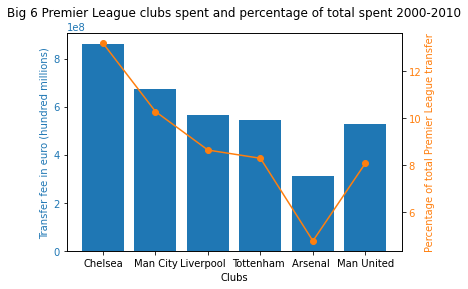

In [43]:
fig, ax1 = plt.subplots()
x = np.array(['Chelsea', 'Man City', 'Liverpool   ','Tottenham ', 'Arsenal ','Man United'])
y1 = np.array([861570000, 671670000, 564550000, 542175000,312020000,528210000 ])
y2 = np.array([13.20,10.29,8.65,8.30,4.78,8.09])
ax1.bar(x, y1, color='C0')
ax1.set_ylabel('Transfer fee in euro (hundred millions)', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx()

ax2.plot(x, y2, color='C1', marker='o')
ax2.set_ylabel('Percentage of total Premier League transfer', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

ax1.set_title('Big 6 Premier League clubs spent and percentage of total spent 2000-2010')
ax1.set_xlabel('Clubs')

plt.show()

In [8]:
def sum_condition(group):
    return group[group['movement'] == 'out']['fee'].sum()

# group the DataFrame by column 'A' and apply the custom function
club_sold = df_1.groupby('club').apply(sum_condition)


club_sold = club_sold.sort_values(ascending=False)
print(club_sold)

club
Liverpool FC               373888000.0
Manchester United          327275000.0
Arsenal FC                 262195000.0
Chelsea FC                 255069000.0
Tottenham Hotspur          232340000.0
West Ham United            224985000.0
Newcastle United           213213000.0
Everton FC                 171265000.0
Manchester City            161640000.0
Portsmouth FC              147525000.0
Blackburn Rovers           145935000.0
Aston Villa                144650000.0
Leeds United               113940000.0
Wigan Athletic             101665000.0
Sunderland AFC              97665000.0
Fulham FC                   95910000.0
Middlesbrough FC            63891000.0
Bolton Wanderers            45937000.0
Derby County                41120000.0
Southampton FC              36970000.0
Charlton Athletic           29867000.0
Birmingham City             29750000.0
Coventry City               26275000.0
West Bromwich Albion        22130000.0
Ipswich Town                18000000.0
Hull City           

In [19]:
#net pay for each club 2000-2010
club_net = club_sold - club_spent
club_net = club_net.sort_values(ascending=True)
print(club_net)

club
Chelsea FC                -606501000.0
Manchester City           -510030000.0
Tottenham Hotspur         -309835000.0
Manchester United         -200935000.0
Liverpool FC              -190662000.0
Sunderland AFC            -170200000.0
Middlesbrough FC          -144169000.0
Aston Villa               -138790000.0
Birmingham City           -101855000.0
Fulham FC                  -95905000.0
Newcastle United           -89222000.0
Stoke City                 -66960000.0
West Bromwich Albion       -64120000.0
Charlton Athletic          -56683000.0
Everton FC                 -51124000.0
Arsenal FC                 -49825000.0
Bolton Wanderers           -45968000.0
Wolverhampton Wanderers    -40930000.0
Leicester City             -19295000.0
Wigan Athletic             -19050000.0
Hull City                  -16595000.0
Southampton FC             -16035000.0
Reading FC                 -15625000.0
Sheffield United           -14700000.0
Burnley FC                 -13450000.0
Ipswich Town        

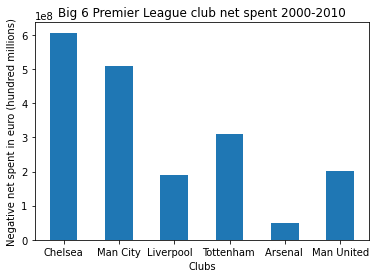

In [39]:
x = np.array(['Chelsea', 'Man City', 'Liverpool   ','Tottenham ', 'Arsenal ','Man United'])
y = np.array([606501000, 510030000, 190662000, 309835000,49825000,200935000 ])


width = 0.5
spacing = 0.5

plt.bar(x, y, width=width)
plt.title('Big 6 Premier League club net spent 2000-2010')
plt.xlabel('Clubs')
plt.ylabel('Negative net spent in euro (hundred millions)')

plt.show()

**Which club spent the most during 2011-2021**

In [22]:
def sum_condition(group):
    return group[group['movement'] == 'in']['fee'].sum()

# group the DataFrame by column 'A' and apply the custom function
club_spent2 = df_2.groupby('club').apply(sum_condition)


club_spent2 = club_spent2.sort_values(ascending=False)
print(club_spent2)

club
Manchester City              1.655405e+09
Chelsea FC                   1.585000e+09
Manchester United            1.483610e+09
Arsenal FC                   1.073250e+09
Liverpool FC                 1.040983e+09
Tottenham Hotspur            8.571600e+08
Everton FC                   7.365800e+08
Leicester City               6.017050e+08
Southampton FC               5.716000e+08
West Ham United              5.508550e+08
Aston Villa                  5.054750e+08
Newcastle United             4.624450e+08
Crystal Palace               3.585600e+08
Wolverhampton Wanderers      3.254000e+08
Watford FC                   3.235500e+08
Brighton & Hove Albion       3.143610e+08
AFC Bournemouth              2.741100e+08
Swansea City                 2.547570e+08
West Bromwich Albion         2.311580e+08
Sunderland AFC               2.309300e+08
Fulham FC                    2.111800e+08
Stoke City                   2.074050e+08
Burnley FC                   1.838100e+08
Norwich City                 

In [40]:
#club spent as a fraction of toal market 2011-2021

spend_sum2 = club_spent2.sum()
club_spent_percentage2 = club_spent2 / spend_sum2
club_spent_percentage2 = club_spent_percentage2.apply(lambda x: '{:.2%}'.format(x))
print(club_spent_percentage2)

club
Manchester City              10.89%
Chelsea FC                   10.43%
Manchester United             9.76%
Arsenal FC                    7.06%
Liverpool FC                  6.85%
Tottenham Hotspur             5.64%
Everton FC                    4.85%
Leicester City                3.96%
Southampton FC                3.76%
West Ham United               3.63%
Aston Villa                   3.33%
Newcastle United              3.04%
Crystal Palace                2.36%
Wolverhampton Wanderers       2.14%
Watford FC                    2.13%
Brighton & Hove Albion        2.07%
AFC Bournemouth               1.80%
Swansea City                  1.68%
West Bromwich Albion          1.52%
Sunderland AFC                1.52%
Fulham FC                     1.39%
Stoke City                    1.36%
Burnley FC                    1.21%
Norwich City                  1.20%
Leeds United                  1.09%
Sheffield United              0.88%
Queens Park Rangers           0.79%
Hull City              

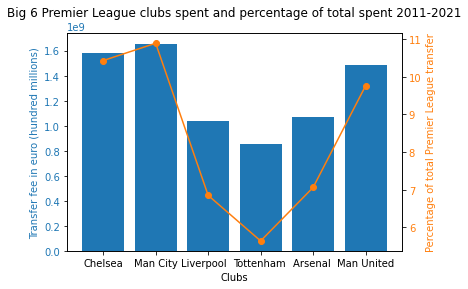

In [44]:
fig, ax1 = plt.subplots()
x = np.array(['Chelsea', 'Man City', 'Liverpool   ','Tottenham ', 'Arsenal ','Man United'])
y1 = np.array([ 1.585000e+09, 1.655405e+09, 1.040983e+09, 8.571600e+08,1.073250e+09,1.483610e+09 ])
y2 = np.array([10.43,10.89,6.85,5.64,7.06,9.76])
ax1.bar(x, y1, color='C0')
ax1.set_ylabel('Transfer fee in euro (hundred millions)', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx()

ax2.plot(x, y2, color='C1', marker='o')
ax2.set_ylabel('Percentage of total Premier League transfer', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

ax1.set_title('Big 6 Premier League clubs spent and percentage of total spent 2011-2021')
ax1.set_xlabel('Clubs')

plt.show()

In [23]:
def sum_condition(group):
    return group[group['movement'] == 'out']['fee'].sum()

# group the DataFrame by column 'A' and apply the custom function
club_sold2 = df_2.groupby('club').apply(sum_condition)


club_sold2 = club_sold2.sort_values(ascending=False)
print(club_sold2)

club
Chelsea FC                   1.090506e+09
Liverpool FC                 6.791700e+08
Tottenham Hotspur            6.581050e+08
Manchester City              5.405110e+08
Southampton FC               5.042000e+08
Arsenal FC                   4.660400e+08
Manchester United            4.295550e+08
Everton FC                   4.213100e+08
Leicester City               3.676700e+08
Aston Villa                  2.538350e+08
West Ham United              2.537750e+08
Swansea City                 2.421600e+08
Newcastle United             1.944000e+08
Watford FC                   1.766800e+08
Crystal Palace               1.371950e+08
Wolverhampton Wanderers      1.292050e+08
Brighton & Hove Albion       1.066200e+08
Sunderland AFC               1.055550e+08
Burnley FC                   8.205000e+07
AFC Bournemouth              7.916500e+07
West Bromwich Albion         7.809500e+07
Stoke City                   6.856500e+07
Norwich City                 6.780500e+07
Fulham FC                    

In [24]:
#net pay for each club 2011-2021
club_net2 = club_sold2 - club_spent2
club_net2 = club_net2.sort_values(ascending=True)
print(club_net2)

club
Manchester City             -1.114894e+09
Manchester United           -1.054055e+09
Arsenal FC                  -6.072100e+08
Chelsea FC                  -4.944940e+08
Liverpool FC                -3.618130e+08
Everton FC                  -3.152700e+08
West Ham United             -2.970800e+08
Newcastle United            -2.680450e+08
Aston Villa                 -2.516400e+08
Leicester City              -2.340350e+08
Crystal Palace              -2.213650e+08
Brighton & Hove Albion      -2.077410e+08
Tottenham Hotspur           -1.990550e+08
Wolverhampton Wanderers     -1.961950e+08
AFC Bournemouth             -1.949450e+08
Leeds United                -1.656800e+08
Fulham FC                   -1.625900e+08
West Bromwich Albion        -1.530630e+08
Watford FC                  -1.468700e+08
Stoke City                  -1.388400e+08
Sheffield United            -1.338500e+08
Sunderland AFC              -1.253750e+08
Norwich City                -1.140400e+08
Burnley FC                  -

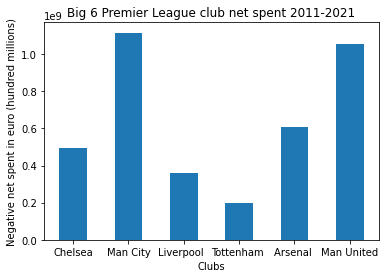

In [45]:
x = np.array(['Chelsea', 'Man City', 'Liverpool  ','Tottenham ', 'Arsenal ','Man United'])
y = np.array([4.944940e+08, 1.114894e+09, 3.618130e+08, 1.990550e+08,6.072100e+08,1.054055e+09])


width = 0.5
spacing = 0.5

plt.bar(x, y, width=width)
plt.title('Big 6 Premier League club net spent 2011-2021')
plt.xlabel('Clubs')
plt.ylabel('Negative net spent in euro (hundred millions)')

plt.show()